## imports

In [10]:
from bigraph_viz import plot_bigraph
from bigraph_viz.dict_utils import replace_regex_recursive

plot_settings = {'size':'8,5', 'show_types': True, 
                 # 'out_dir': 'out', 'dpi': '250', 'file_format': 'png'
                }

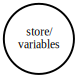

In [11]:
# simple spec
simple_object_spec = {'store/<br/>variables': {}}

# plot
plot_bigraph(simple_object_spec, **plot_settings, filename='store')

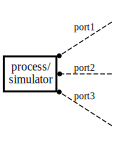

In [12]:
# process spec
process_spec = {
    'process/<br/>simulator': {
        '_ports': {
            'port1': 'type',
            'port2': 'type',
            'port3': 'type'}}}

# plot
plot_settings1 = {'rankdir':'RL', **plot_settings}
plot_bigraph(process_spec, **plot_settings1, filename='process')

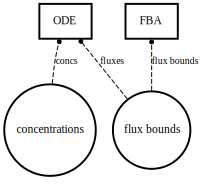

In [13]:
# composite spec
flat_composite_spec = {
    'concentrations': {},
    'flux bounds': {},
    'ODE': {
        '_ports': {'concs': 'type', 'fluxes': 'type',},
        'wires': {
            'concs': 'concentrations',
            'fluxes': 'flux bounds'}},
    'FBA': {
        '_ports': {'flux bounds': 'type'},
        'wires': {
            'flux bounds': 'flux bounds'}}}

# plot
plot_settings1 = {'rankdir':'BT', **plot_settings}
plot_bigraph(flat_composite_spec, **plot_settings1, filename='composite')

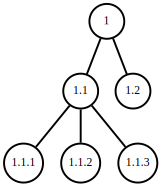

In [14]:
# hierarchy spec
hierarchy = {
    '1': {
        '1.1': {'1.1.1': '',
              '1.1.2': '',
              '1.1.3': ''},
        '1.2': {}}}

# plot
plot_bigraph(hierarchy, **plot_settings, filename='hierarchy')

## Modeling subaim 1

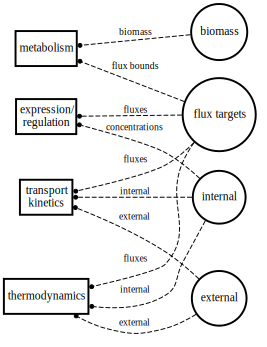

In [15]:
internal_concs = 'internal'
external_concs = 'external'

# aim 1 schema
aim1 = {
    'biomass': {},
    'flux targets': {},
    internal_concs: {},
    external_concs: {},
    'expression/<br/>regulation': {
        '_ports': {'fluxes': '', 'concentrations': ''},
        'wires': {
            'fluxes': 'flux targets',
            'concentrations': internal_concs
        }
    },
    'transport<br/>kinetics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        'wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'thermodynamics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        'wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'metabolism': {
        '_ports': {'flux bounds': '', 'biomass': ''},
        'wires': {
            'flux bounds': 'flux targets',
            'biomass': 'biomass'}
    },
}

# plot
plot_settings2 = {'rankdir':'RL', **plot_settings}
plot_bigraph(aim1, **plot_settings2, filename='aim1')

## Modeling subaim 2

In [16]:
# # generic schema
# env_schema1 = {
#     '_ports': {'': '',}, 
#     'wires': {'': []}}
# env_schema2 = {
#     '_ports': {'1': '', '2': '', '3': '',},
#     'wires': {
#         '1': 'zone1',
#         '2': 'zone2',
#         '3': 'zone3'}}
# exchange_schema = {
#      '_ports': {'1': '', '2': '',},
#      'wires': {
#          '1': [],
#          '2': ['..', 'environment']
#      }}
# env_layer_schema = {'': {'_value': 
#                     '<font point-size="10">'
#                     'O<sub><font point-size="5">2</font></sub>, '
#                     'H<sub><font point-size="5">2</font></sub>O, '
#                     'C<br/>'
#                     '</font>'
#                    }}

# # aim 2 schema
# aim2 = {
#     'microbes': {
#          'transport': exchange_schema,
#          'secretions': exchange_schema},
#     'environment': {
#         'zone1': env_layer_schema,
#         'zone2': env_layer_schema,
#         'zone3': env_layer_schema,
#         'network<br/>diffusion': env_schema2,
#         'extracellular<br/>biochemistry': env_schema1,
#         'barriers': env_schema1
#     }}

# # plot
# plot_settings2 = {
#     'node_groups':[[('environment',), ('microbes',)]], 
#     'invisible_edges': [
#         (('microbes',), ('microbes', 'transport')),
#         (('microbes',), ('microbes', 'secretions')),
#         (('environment',), ('environment', 'network<br/>diffusion')),
#         (('environment',), ('environment', 'extracellular<br/>biochemistry')),
#         (('environment',), ('environment', 'barriers'))
#     ],
#     'port_labels': False,
#     **plot_settings}
# plot_bigraph(aim2, **plot_settings2, filename='aim2')

## Modeling subaim 3

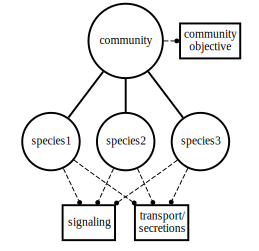

In [19]:
# generic schema
obj_schema = {'_ports': {'1': ''}, 'wires': {'1': []}}
molecular_mechanism_schema = {
            '_ports': {'1': '', '2': '', '3': ''},
            'wires': {
                '1': 'species1',
                '2': 'species2',
                '3': 'species3'}}

# aim 3 schema
aim3 = {
    'community': {
        'species1': {},
        'species2': {},
        'species3': {},
        'community<br/>objective': {
            '_ports': {'1': ''},
            'wires': {'1': []}
        },
        'signaling': molecular_mechanism_schema,
        'transport/<br/>secretions': molecular_mechanism_schema
    },
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[
        # ('environment',), 
        ('community',), 
        ('community', 'community<br/>objective')
    ]], 
    'invisible_edges': [
        (('community',), ('community', 'community<br/>objective')),
        (('community',), ('community', 'signaling')),
        (('community',), ('community', 'transport/<br/>secretions')),
    ],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim3, **plot_settings2, filename='aim3')

## Modeling subaim 4

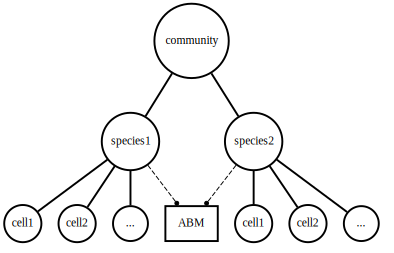

In [20]:
# aim 4 schema
aim4 = {
    'community': {
        'species1': {'cell1': {}, 'cell2': {}, '...': {}},
        'species2': {'cell1': {}, 'cell2': {}, '...': {}},
        'ABM': {
            '_ports': {
                '1': '', 
                '2': '', 
                # 'env': '',
            },
            'wires': {
                '1': 'species1',
                '2': 'species2',
                # 'env': ['..', '..', 'environment'],
            }}},
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[
        # ('environment',), 
        ('community',)
    ]], 
    'invisible_edges': [(('community',), ('community', 'ABM'))],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim4, **plot_settings2, filename='aim4')